**K Means Clustering Implementation**

<img src="/content/sample_data/KMC.png">

In this module, we will utilize the KMeans module from sci-kit learn. This will allow us to rapidly develop a model and use the built in model metrics to develop and compare our model quickly and easily.

To provide clearer context into how K Means Clustering works, we will create our own dataset using the make_blobs module from sklearn. This will give us control over how the data looks and allow us to graphically plot the data. We will therefore replace the normal Phase 1 with data creation.


Phase 1: Data creation

Phase 2: Train the model

Phase 3: Test the model

Phase 4: Compare the results

**Phase 1&2 - Data Creation and Train the Model**

Scitkit-Learn makes this step increadibly simple. To create the data, we will pass the number of samples, centers, and standard deviation value to the make_blobs module. This will return an X and y dataset. K Means and an unsupervised machine learning algorithm, which operates under the pretense the labels are unkown. The K Means Cluster algorithm will assign k-number of centroids to the dataset to minimize the distance between the centroids and the datapoints assigned to them.

We will initialize the dataset to have 4 centers, and assign the same number of clusters when initializing the algorithm.

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Generating synthetic dataset
# Creating clusters using make_blobs
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=4, random_state=42)

# Initializing KMeans model
km = KMeans(n_clusters=4, init='random')

# Fitting KMeans to the generated dataset
km.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=4)

**Phase 3: Test the Model**

If the labels are unknown, we cannot run an error analysis to determine the validity of our model. Scikit Learn provides a score for the algorithm, however it is just the sum of distances between the centroids and the assigned datapoints. If this was our metric for proving validity, we would always assign a number of centroids close to the number of datasets to minimize the distances, however this would not be useful. To test the model, we will plot the decision boundaries and visually inspect the results.

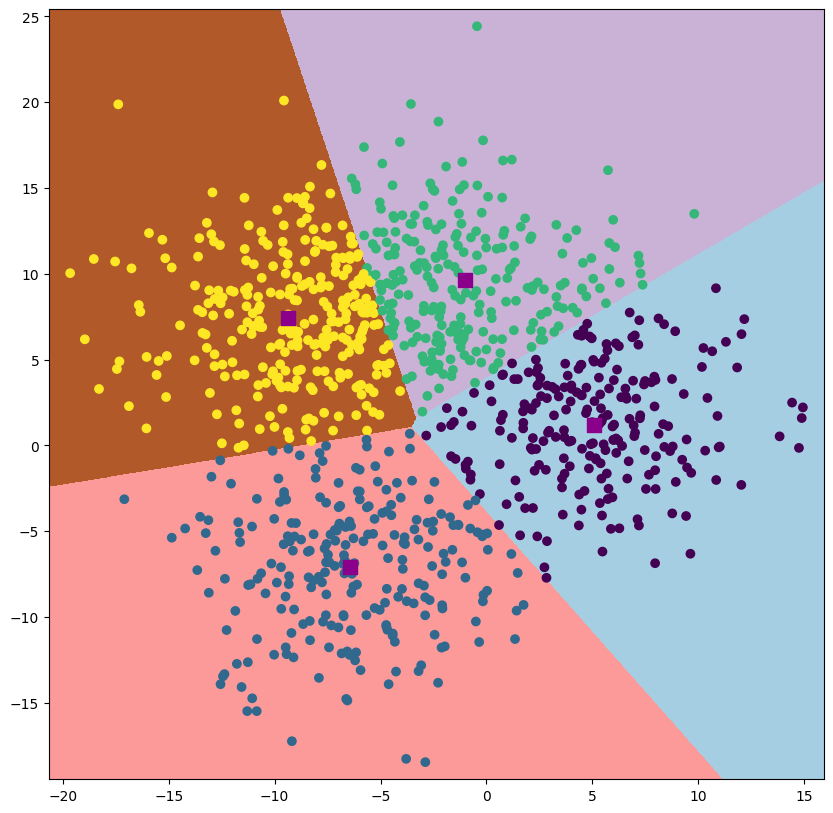

In [2]:
# Visualizing the dataset
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Scatter plot of data points colored by cluster labels
ax.scatter(X[:, 0], X[:, 1], c=km.labels_)

# Marking cluster centers with square markers
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='s', s=100, c='darkmagenta')

# Plotting decision boundaries
h = 0.02
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Generating meshgrid for decision boundary
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Displaying decision boundaries as an image
plt.imshow(Z,
           interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto',
           origin='lower')


The graph above looks accruate. Each cluster is grouped together correctly, and the decision boundaries create a valid sector for each label. If this was a real dataset, we would be looking to find clusters of datat that reveals information about the dataset. We created the dataset, and therefore knew the correct number of clusters. What would the data look like if we assigned the incorrect number of clusters to the K Means algorithm?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


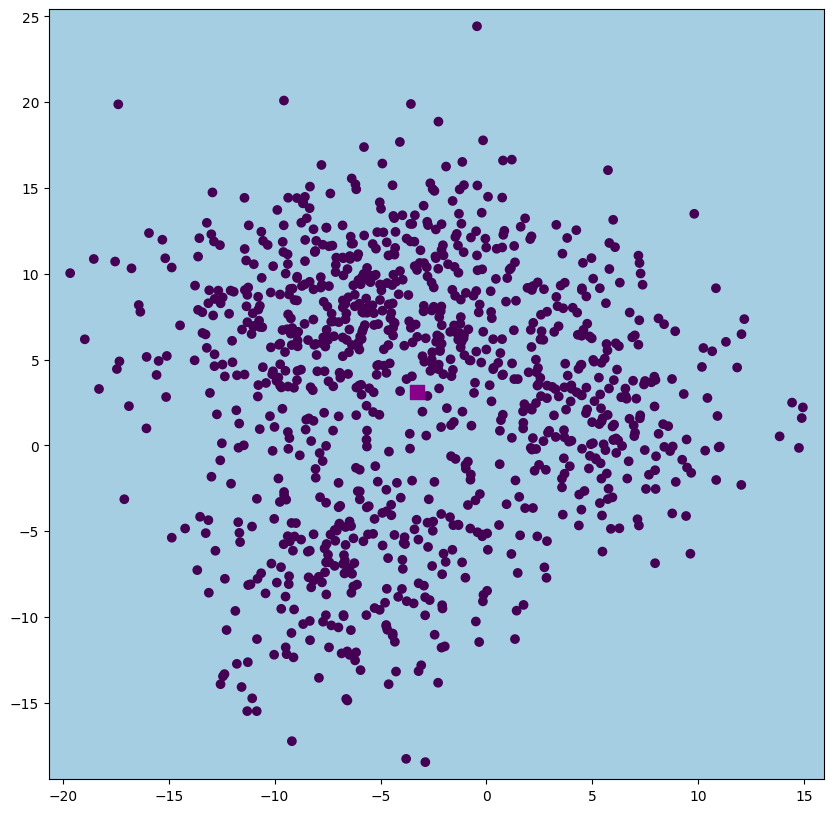

In [3]:
# Generating synthetic dataset
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=4, random_state=42)

# Initializing KMeans with 1 cluster
km = KMeans(n_clusters=1, init='random')
km.fit(X)

# Visualizing the dataset and KMeans results
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Scatter plot of data points colored by cluster labels
ax.scatter(X[:, 0], X[:, 1], c=km.labels_)

# Marking cluster centers with square markers
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='s', s=100, c='darkmagenta')

# Plotting decision boundaries for 1 cluster (not meaningful)
h = 0.02
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Displaying decision boundaries as an image (not meaningful for 1 cluster)
plt.imshow(Z,
           interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto',
           origin='lower')


**1 Cluster**

Looking at the pure dataset, we can almost intuitively tell the data groups itself into more than 1 cluster. More clusters would describe the data better.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


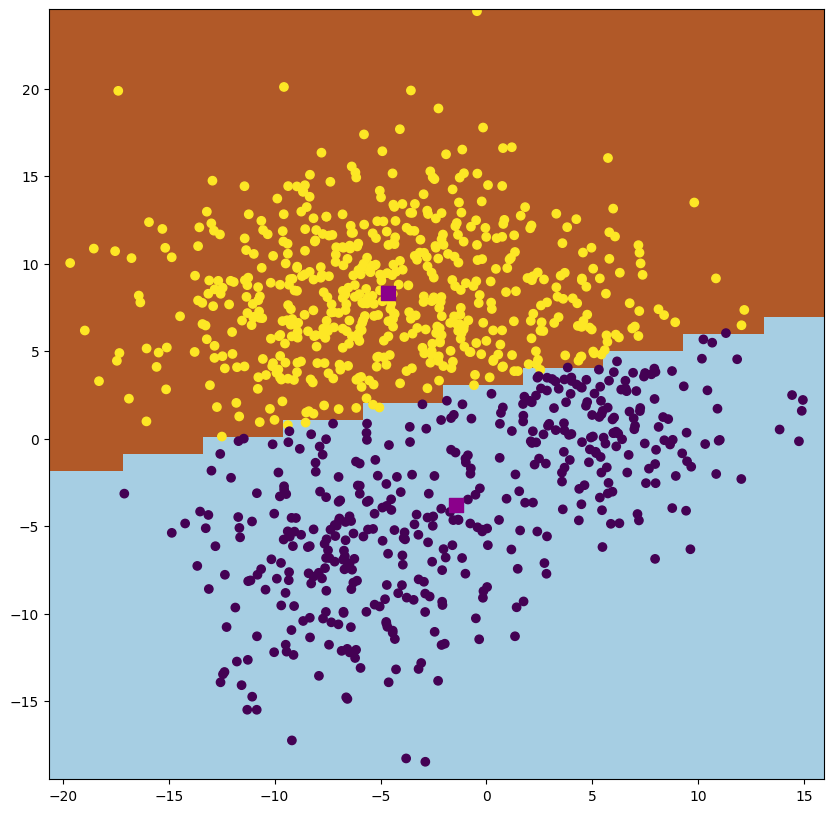

In [5]:
# Create dataset
X, y = make_blobs(n_samples = 1000, centers = 4, cluster_std = 4, random_state = 42)

km = KMeans(n_clusters=2, init='random')
km.fit(X)

# Display dataset
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.scatter(X[:,0], X[:,1], c= km.labels_)

ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='s', s =100, c = 'darkmagenta')

# Plot decision boundaries
h = 0.02
x1_min, x1_max = X[:,0].min() -1, X[:,0].max() +1
x2_min, x2_max = X[:,1].min() -1, X[:,1].max() +1

xx,yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max))
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation='nearest',
    extent = (xx.min(), xx.max(), yy.min(), yy.max()),
    cmap = plt.cm.Paired,
    aspect = 'auto',
    origin = 'lower',
)

**2 Clusters**

Assigning 2 clusters to our algorithm describes the dataset moderatly better. Intuition still pulls towards higher number of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


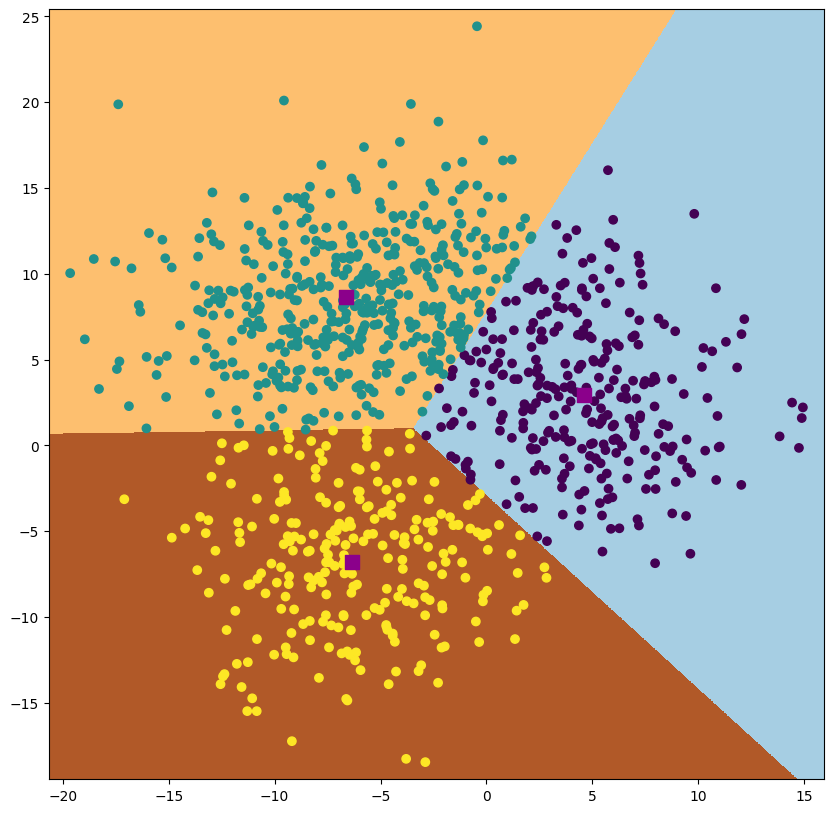

In [6]:
# Generating a synthetic dataset with 4 clusters
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=4, random_state=42)

# Initializing KMeans with 3 clusters
km = KMeans(n_clusters=3, init='random')
km.fit(X)

# Visualizing the dataset and KMeans clustering results
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Scatter plot of data points colored by cluster labels
ax.scatter(X[:, 0], X[:, 1], c=km.labels_)

# Marking cluster centers with square markers
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='s', s=100, c='darkmagenta')

# Plotting decision boundaries for 3 clusters
h = 0.02
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Displaying decision boundaries as an image for 3 clusters
plt.imshow(Z,
           interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto',
           origin='lower')


**3 Clusters**

Assigning 3 clusters looks to describe the data almost perfectly. If the number of clusters was unknown, 3 clusters looks almost as valid as 4. There are higher densities toward the fringes of some data clusters, but this could be an acceptable number of clusters if inspecting purely visually.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


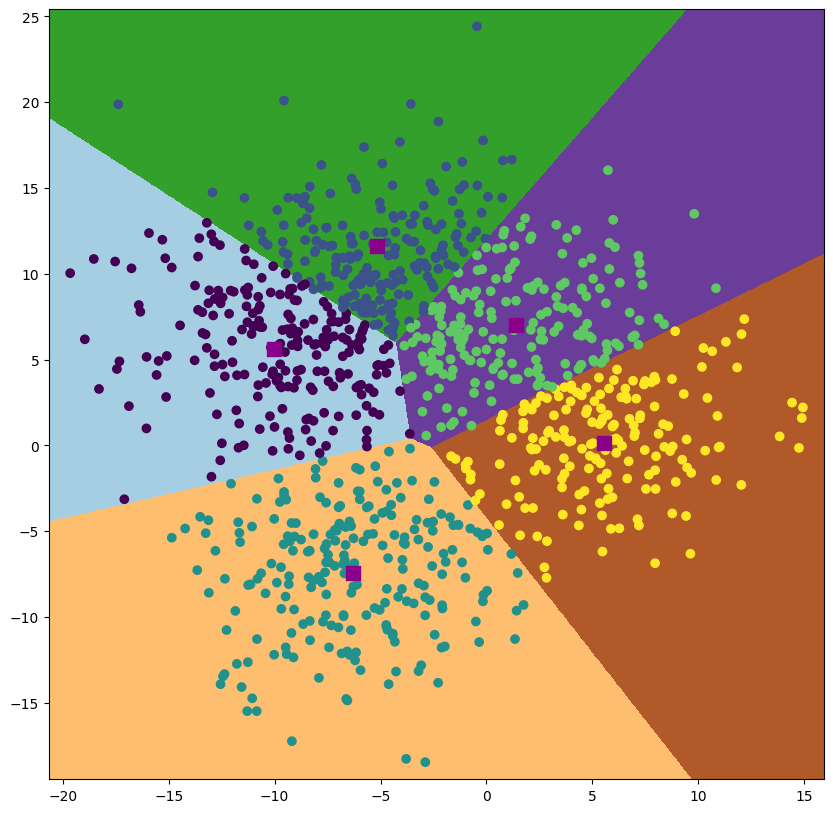

In [7]:
# Generating a synthetic dataset with 4 clusters
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=4, random_state=42)

# Initializing KMeans with 5 clusters
km = KMeans(n_clusters=5, init='random')
km.fit(X)

# Visualizing the dataset and KMeans clustering results
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Scatter plot of data points colored by cluster labels
ax.scatter(X[:, 0], X[:, 1], c=km.labels_)

# Marking cluster centers with square markers
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='s', s=100, c='darkmagenta')

# Plotting decision boundaries for 5 clusters
h = 0.02
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Displaying decision boundaries as an image for 5 clusters
plt.imshow(Z,
           interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto',
           origin='lower')


**5 Clusters**

5 clusters looks as valid as 3 clusters. The higher densities of data at the fringes have been assigned their own clusters, and does not look as though the data is overfit. This could also be a valid number of clusters if inspecting visually.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


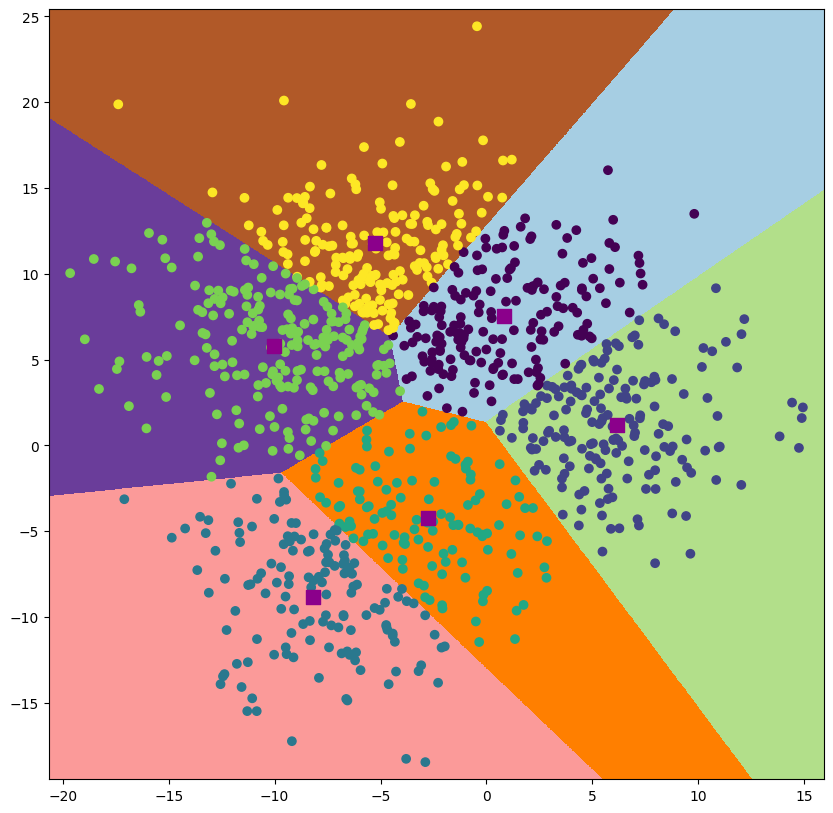

In [8]:
# Generating a synthetic dataset with 4 clusters
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=4, random_state=42)

# Initializing KMeans with 6 clusters
km = KMeans(n_clusters=6, init='random')
km.fit(X)

# Visualizing the dataset and KMeans clustering results
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Scatter plot of data points colored by cluster labels
ax.scatter(X[:, 0], X[:, 1], c=km.labels_)

# Marking cluster centers with square markers
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='s', s=100, c='darkmagenta')

# Plotting decision boundaries for 6 clusters
h = 0.02
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Displaying decision boundaries as an image for 6 clusters
plt.imshow(Z,
           interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto',
           origin='lower')


**6 Clusters**

As with 5 clusters, 6 looks valid. As clusters counts increase, partitions in the data become clearer. It seems as though if we continuously increase clusters, we will convince ourselves the higher number of clusters are better.

**Phase 4: Compare the Results**

We know, however, the correct number of clusters is 4. Could a higher cluster count describe our dataset better? How do we know when to stop without having to look at every possible cluster value, or rely solely on our intuition? If the dimensionality of our data was higher, we wouldnt be able to visualize the impact on the number of clusters without using an dimension reduction algorithm like PCA. This can be solved using the score metric from scikit-learn's k-means algorithm. As mentioned previously, the score metric provides the distance between the centroids and their assigned datapoints. The objectie of k-means is to minimze this distance, which is accomplished by adding higher centroid counts. If we measure this score for each count of centroids, we should be able to find an 'elbow' where the impact of adding more clusters is no longer significant. Below, we will plot the score of assigning 1-10 centriods.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

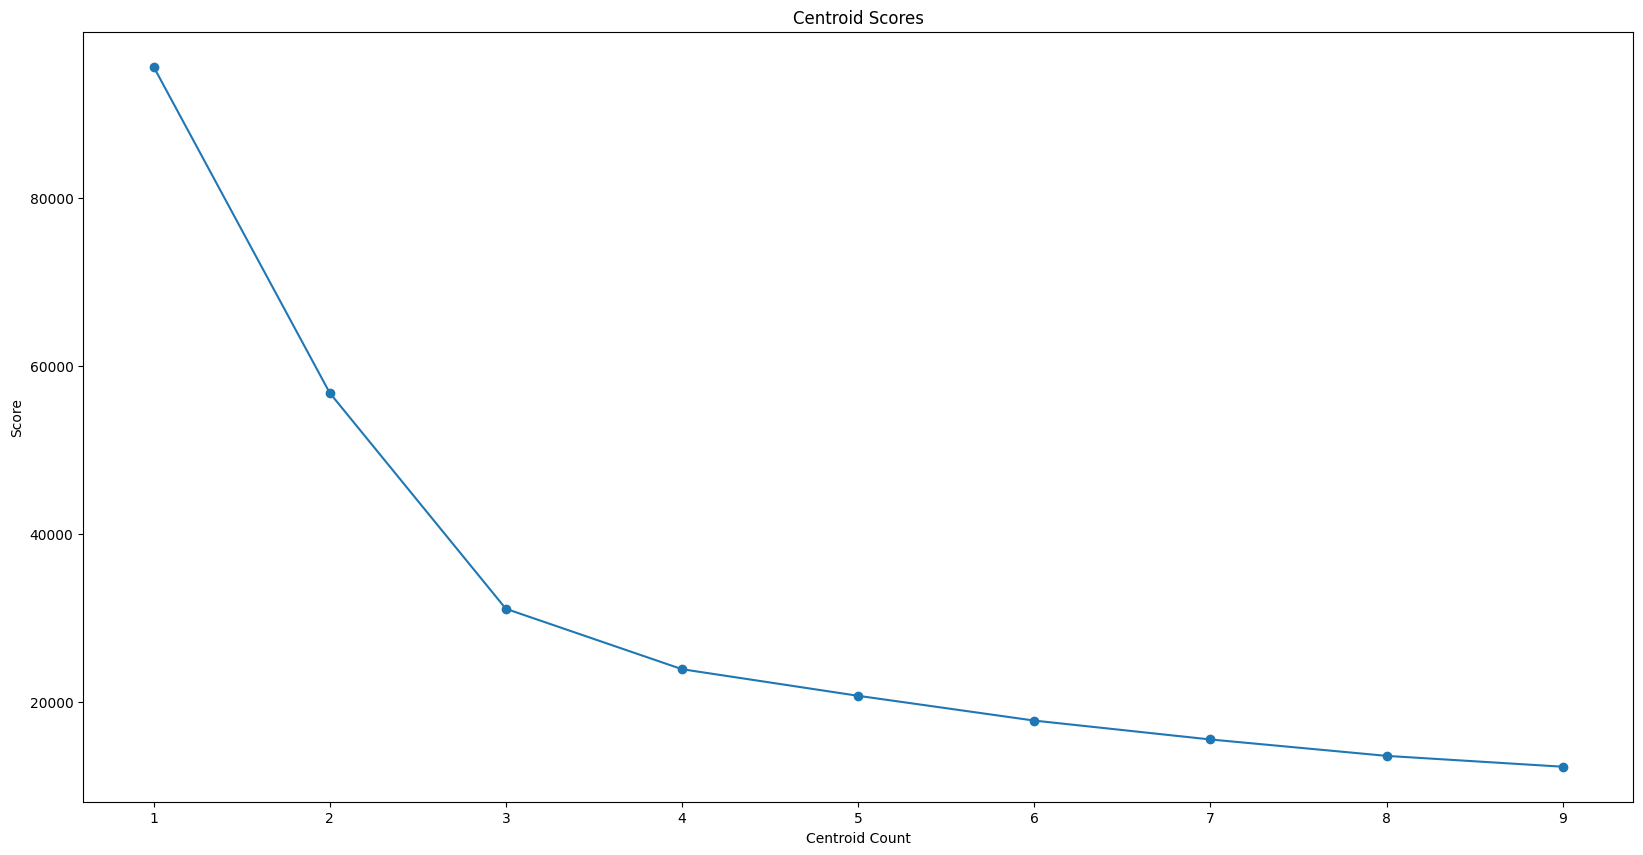

In [9]:
# Generating a synthetic dataset with 4 clusters
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=4, random_state=42)
all_score = []

# Calculating scores for different centroid counts
for i in range(1, 10):
    # Applying KMeans with varying centroid counts
    km = KMeans(n_clusters=i, init='random')
    km.fit(X)
    # Collecting negative scores
    all_score.append(-km.score(X))

# Plotting scores against centroid counts
plt.figure(figsize=(20, 10))
plt.plot(range(1, 10), all_score)
plt.scatter(range(1, 10), all_score)
plt.xlabel('Centroid Count')
plt.ylabel('Score')
plt.title('Centroid Scores')
plt.show()


Looking at the plot, we observe a substantial shift in scores when adding 1-3 centroids. The score alteration between 3-4 centroids remains more pronounced compared to 4-5, although not as significant as the change between 2-3 centroids. This confirms our earlier assumptions: continually increasing centroids initially enhances the model, but after reaching 4, the discernible improvements diminish. This technique, known as the 'elbow' method, assists in determining the optimal centroid count. Beyond 4 centroids, the model's enhancement becomes less substantial. Therefore, based on the data, it's reasonable to conclude that the optimal number of centroids should be 4.





